# <h1><center> *ML-2 Mid Project Exploratory Data Analysis* </center></h1>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import scipy.stats

import missingno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print("Shape of train dataset: ", train.shape)
train.head(3)

Shape of train dataset:  (72161, 12)


,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
0,1,66.0,NaN,4000.0,NaN,1.0,0.569108,0.05488766900000001,0.0,0.0,0.0,0
1,2,61.0,2.0,4000.0,6.0,1.0,0.297176,0.10194991099999999,0.0,0.0,0.0,0
2,3,31.0,2.0,3040.0,8.0,0.0,0.160145,1.22713507,4.0,0.0,0.0,1


In [4]:
print("Shape of test dataset: ", test.shape)
test.head(3)

Shape of test dataset:  (48108, 11)


,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more
0,1,30.0,2.0,2200.0,0.0,0.0,0.000000,0.9999998999999999,NaN,0.0,0.0
1,2,25.0,2.0,1500.0,3.0,0.0,0.269820,NaN,1.0,1.0,3.0
2,3,48.0,2.0,7163.0,12.0,0.0,0.011865,0.065853835,0.0,0.0,0.0


In [5]:
test.dtypes

Id                                                    int64
age                                                 float64
number_dependent_family_members                     float64
monthly_income                                      float64
number_of_credit_lines                              float64
real_estate_loans                                   float64
ratio_debt_payment_to_income                        float64
credit_line_utilization                              object
number_of_previous_late_payments_up_to_59_days      float64
number_of_previous_late_payments_up_to_89_days      float64
number_of_previous_late_payments_90_days_or_more    float64
dtype: object

In [6]:
test.dtypes

Id                                                    int64
age                                                 float64
number_dependent_family_members                     float64
monthly_income                                      float64
number_of_credit_lines                              float64
real_estate_loans                                   float64
ratio_debt_payment_to_income                        float64
credit_line_utilization                              object
number_of_previous_late_payments_up_to_59_days      float64
number_of_previous_late_payments_up_to_89_days      float64
number_of_previous_late_payments_90_days_or_more    float64
dtype: object

#### *credit_line_utilization columns seems to have incorrect datatype, we will be correcting it on both dataset.*

In [7]:
train["credit_line_utilization"] = train["credit_line_utilization"].replace(',','.', regex=True).astype(float)
test["credit_line_utilization"] = test["credit_line_utilization"].replace(',','.', regex=True).astype(float)
#Used replace function to replace some "," in float values (this can be caused due to non-English Excel version)

### *Let's analyze descriptive statistics*


In [8]:
train.describe()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more,defaulted_on_loan
count,72161.000000,65017.000000,67945.000000,6.614500e+04,66007.000000,68355.000000,66553.000000,65815.000000,67966.000000,66316.000000,68540.000000,72161.000000
mean,36081.000000,51.388914,0.847009,6.624388e+03,8.756193,1.050296,26.524005,5.225040,0.393491,0.206074,0.224059,0.069470
std,20831.230725,14.414338,1.144038,1.084630e+04,5.198769,1.114420,399.253008,212.152963,3.680686,3.696260,3.634436,0.254253
min,1.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18041.000000,41.000000,0.000000,3.400000e+03,5.000000,0.000000,0.141302,0.035123,0.000000,0.000000,0.000000,0.000000
50%,36081.000000,51.000000,0.000000,5.400000e+03,8.000000,1.000000,0.294673,0.176500,0.000000,0.000000,0.000000,0.000000
75%,54121.000000,62.000000,2.000000,8.232000e+03,11.000000,2.000000,0.480989,0.578536,0.000000,0.000000,0.000000,0.000000
max,72161.000000,103.000000,13.000000,1.560100e+06,57.000000,25.000000,61106.500000,29110.000000,98.000000,98.000000,98.000000,1.000000


In [9]:
test.describe()

,Id,age,number_dependent_family_members,monthly_income,number_of_credit_lines,real_estate_loans,ratio_debt_payment_to_income,credit_line_utilization,number_of_previous_late_payments_up_to_59_days,number_of_previous_late_payments_up_to_89_days,number_of_previous_late_payments_90_days_or_more
count,48108.000000,43270.000000,45320.000000,4.399400e+04,43990.000000,45649.000000,44344.000000,43798.000000,45296.000000,44175.000000,45654.000000
mean,24054.500000,51.243517,0.859466,6.718883e+03,8.751739,1.061776,26.158818,7.075899,0.358619,0.165161,0.189972
std,13887.727712,14.439890,1.156826,1.865921e+04,5.139796,1.195983,392.638572,328.469264,3.129090,3.108069,3.143991
min,1.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12027.750000,40.000000,0.000000,3.400000e+03,5.000000,0.000000,0.146447,0.034656,0.000000,0.000000,0.000000
50%,24054.500000,51.000000,0.000000,5.400000e+03,8.000000,1.000000,0.298229,0.176713,0.000000,0.000000,0.000000
75%,36081.250000,61.000000,2.000000,8.207500e+03,11.000000,2.000000,0.483507,0.578885,0.000000,0.000000,0.000000
max,48108.000000,103.000000,20.000000,3.008750e+06,58.000000,54.000000,49112.000000,50708.000000,98.000000,98.000000,98.000000


In [10]:
train.isnull().sum()

Id                                                     0
age                                                 7144
number_dependent_family_members                     4216
monthly_income                                      6016
number_of_credit_lines                              6154
real_estate_loans                                   3806
ratio_debt_payment_to_income                        5608
credit_line_utilization                             6346
number_of_previous_late_payments_up_to_59_days      4195
number_of_previous_late_payments_up_to_89_days      5845
number_of_previous_late_payments_90_days_or_more    3621
defaulted_on_loan                                      0
dtype: int64

In [11]:
test.isnull().sum()

Id                                                     0
age                                                 4838
number_dependent_family_members                     2788
monthly_income                                      4114
number_of_credit_lines                              4118
real_estate_loans                                   2459
ratio_debt_payment_to_income                        3764
credit_line_utilization                             4310
number_of_previous_late_payments_up_to_59_days      2812
number_of_previous_late_payments_up_to_89_days      3933
number_of_previous_late_payments_90_days_or_more    2454
dtype: int64

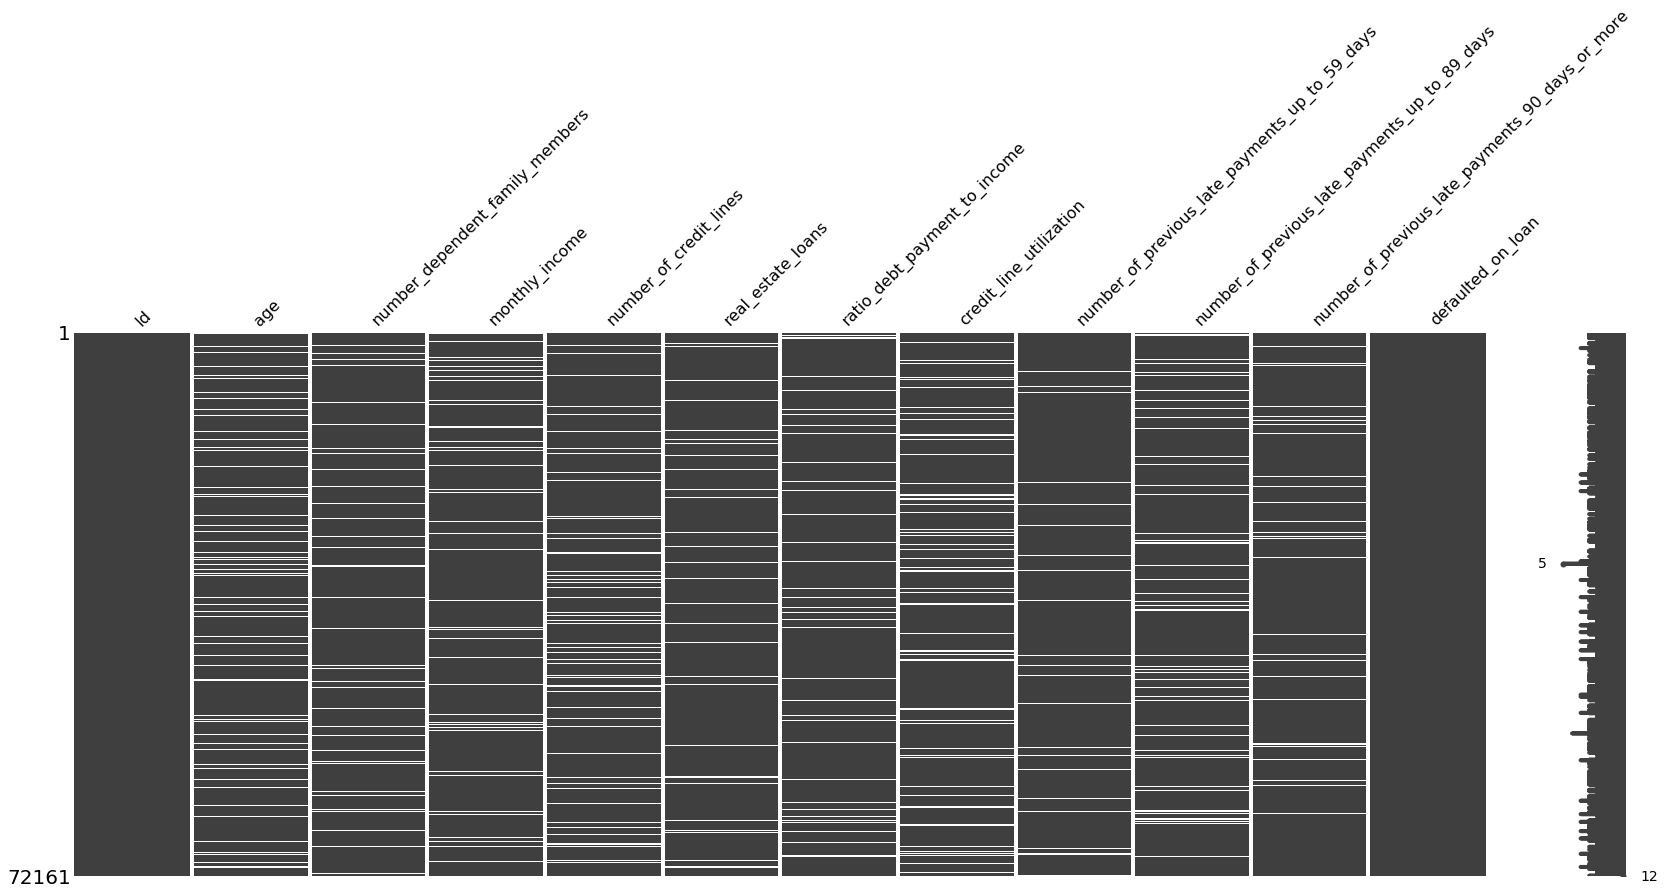

In [12]:
missingno.matrix(train)

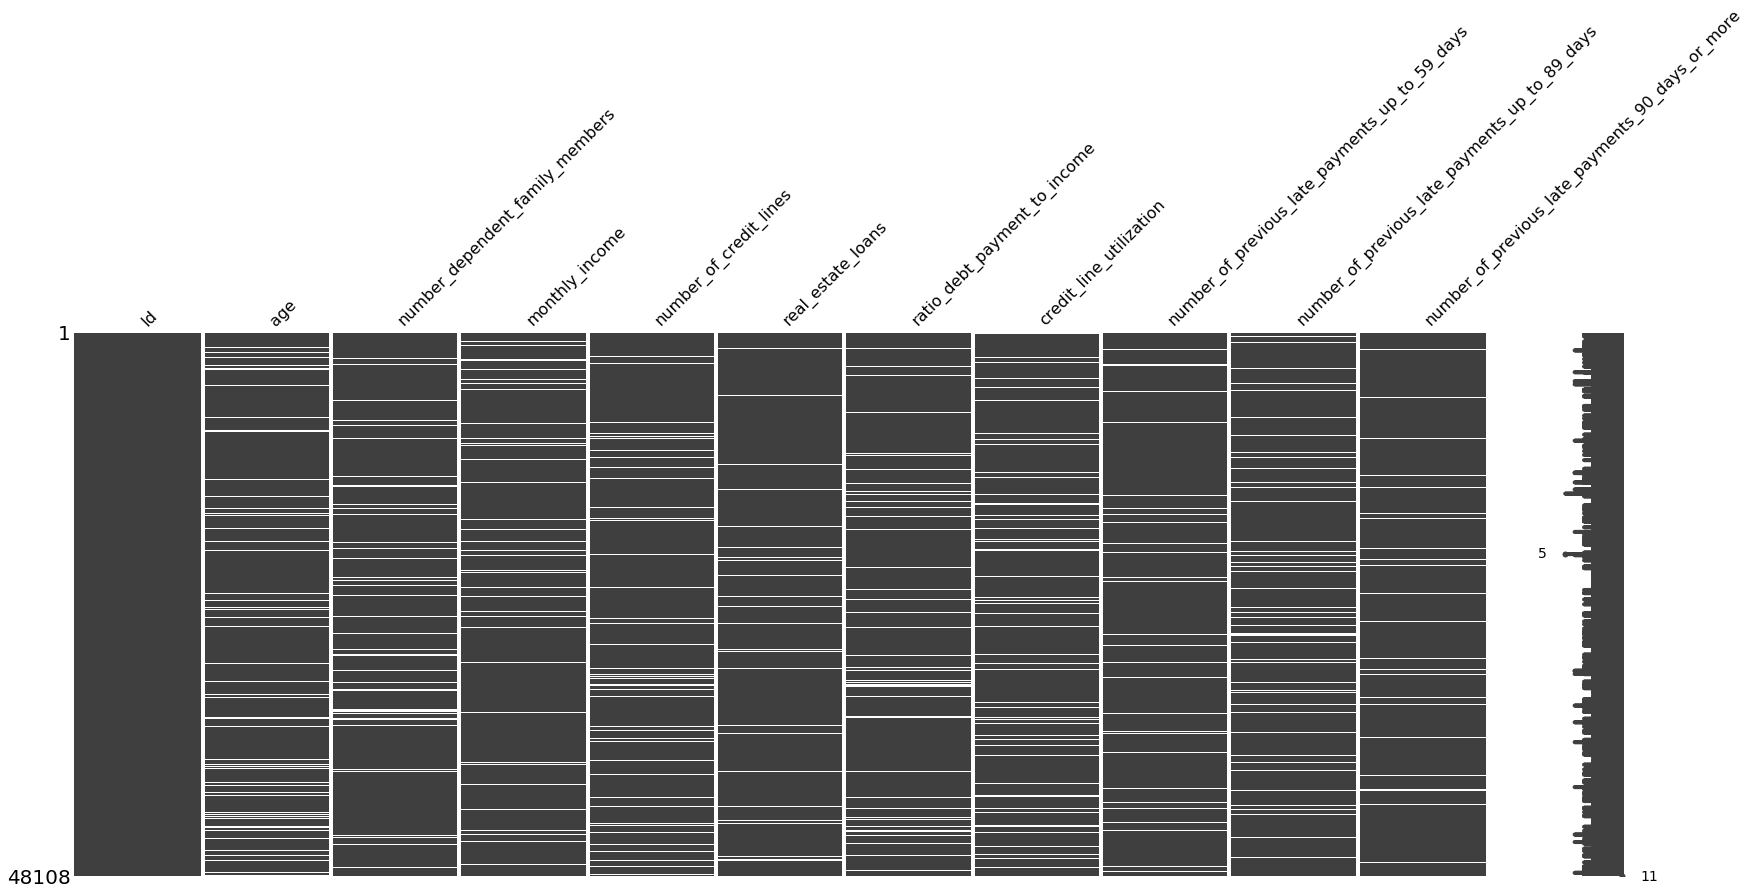

In [13]:
missingno.matrix(test)

In [14]:
train2 = train.copy() #taking copies of data in order to preserve the original data and preventing errors in case of reruns
test2 = test.copy()

### Let's impute missing values for visualizations, which can also be done inside of the Pipeline

In [15]:
from sklearn.impute import SimpleImputer 

imputer=SimpleImputer(missing_values=np.nan,strategy='median')
float_cols = train2.loc[:, train2.dtypes == np.float64]
float_cols2 = test2.loc[:, test2.dtypes == np.float64]

imputer=imputer.fit(float_cols)
imputer2 = imputer.fit(float_cols2)

train2.loc[:, train2.dtypes == np.float64]=imputer.transform(float_cols)
test2.loc[:, test2.dtypes == np.float64]=imputer.transform(float_cols2)

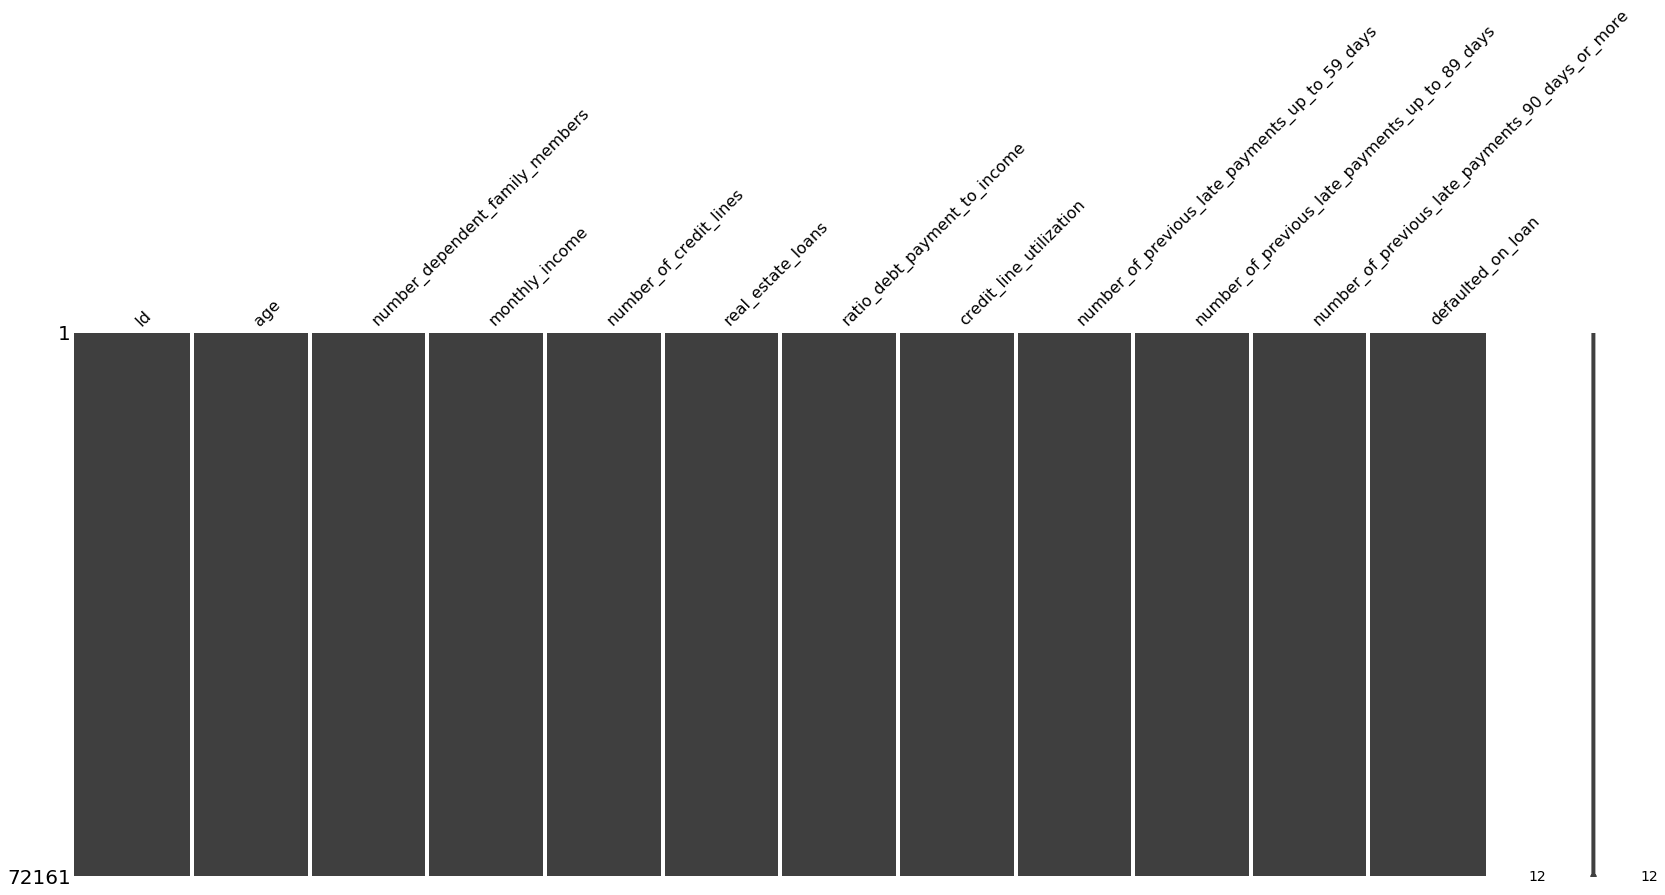

In [16]:
missingno.matrix(train2)

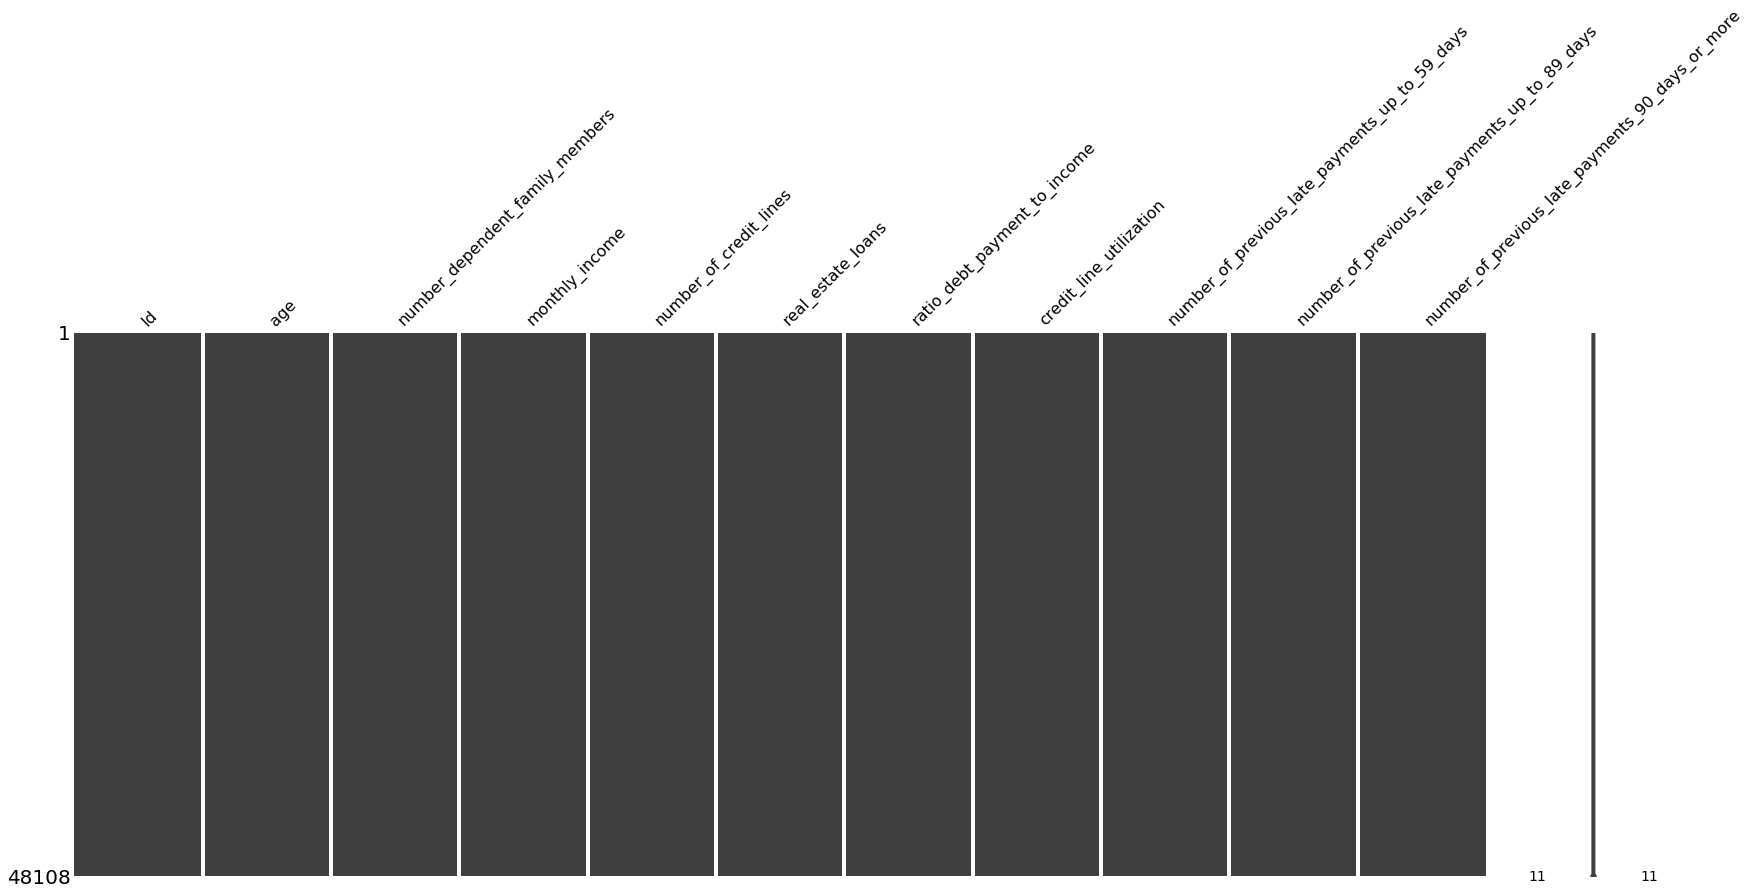

In [17]:
missingno.matrix(test2)

## Visualizations

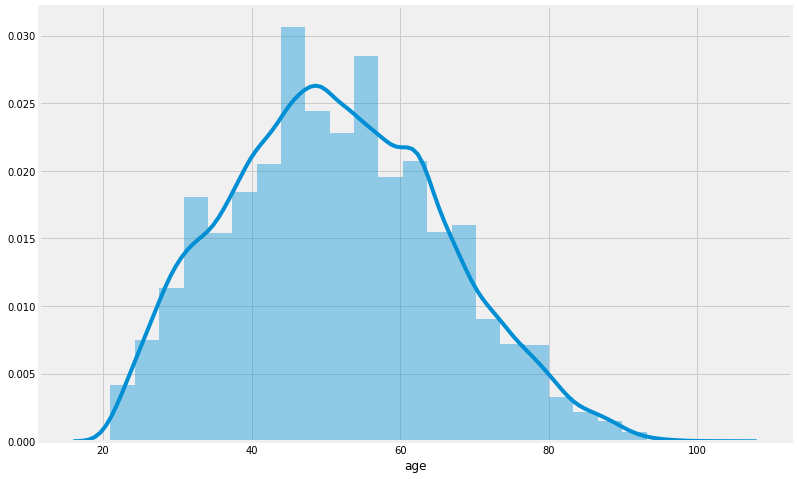

In [50]:
plt.figure(figsize=(12,8))

sns.distplot(train.age, bins=25)
plt.show()

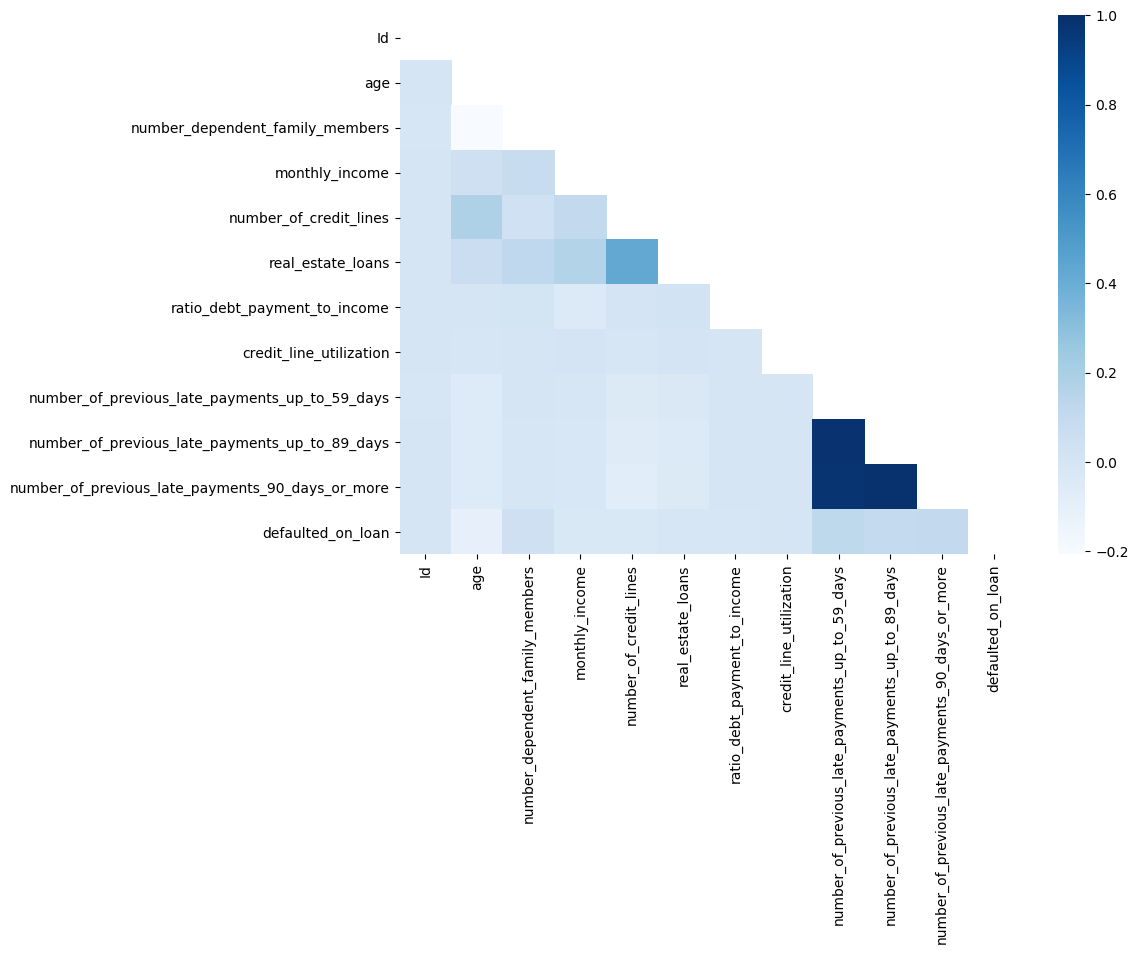

In [19]:
plt.style.use('default')

corrmat = train.corr()
matrix = np.triu(corrmat)
plt.subplots(figsize=(10,7))
sns.heatmap(corrmat,mask=matrix, cmap="Blues")

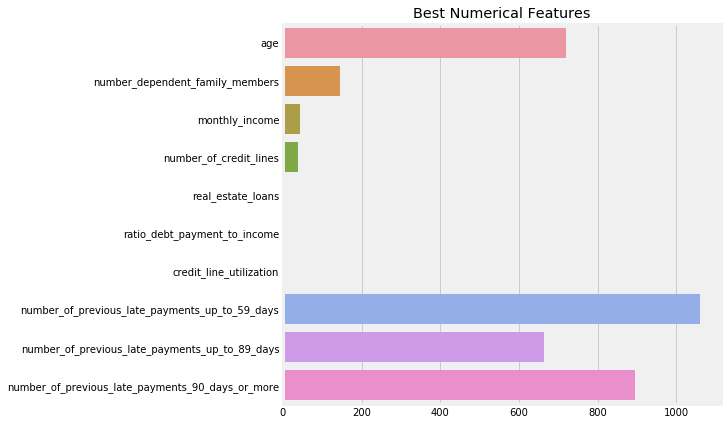

In [32]:
from sklearn.feature_selection import SelectKBest,f_classif

numerical=['age','number_dependent_family_members','monthly_income','number_of_credit_lines','real_estate_loans','ratio_debt_payment_to_income','credit_line_utilization','number_of_previous_late_payments_up_to_59_days','number_of_previous_late_payments_up_to_89_days','number_of_previous_late_payments_90_days_or_more']
n = SelectKBest(score_func=f_classif, k=10)
numcols=n.fit(train2[numerical],train2['defaulted_on_loan'])
plt.figure(figsize=(7,7))
sns.barplot(x=numcols.scores_,y=numerical)
plt.title('Best Numerical Features')
plt.show()

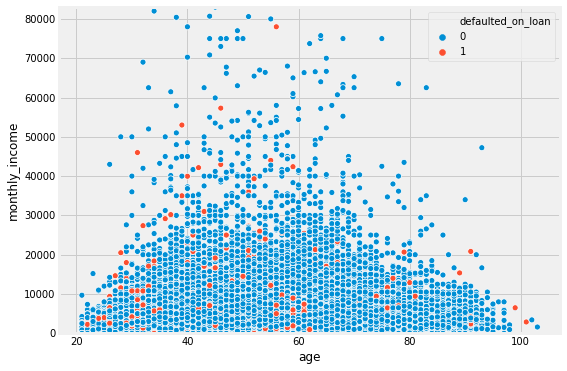

In [49]:
fig, ax = plt.subplots(figsize=(8,6))
ax.set_ylim((0,83000))
sns.scatterplot(data=train, x='age', y='monthly_income', hue='defaulted_on_loan');

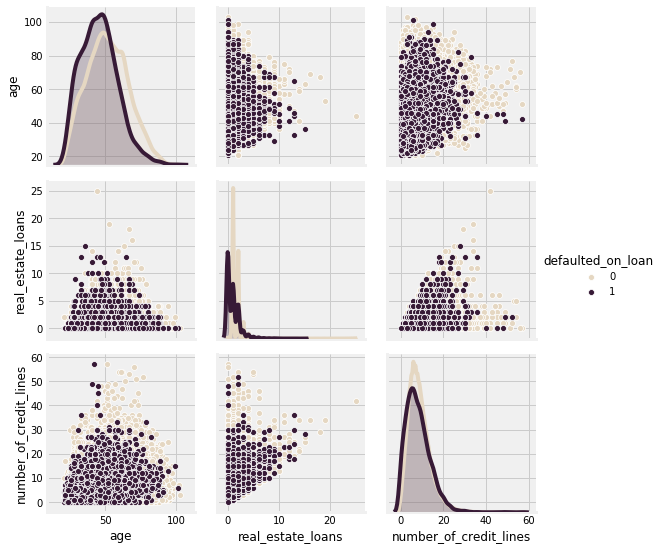

In [35]:
sns.pairplot(vars = ['age', 'real_estate_loans', 'number_of_credit_lines'],
                data = train, hue='defaulted_on_loan', palette='ch:.25')

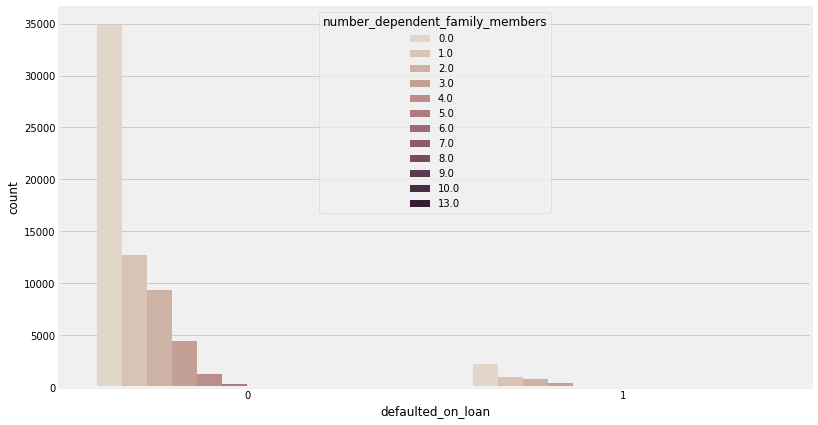

In [45]:
fig, ax = plt.subplots(figsize=(12,7))
sns.countplot(x = 'defaulted_on_loan', hue='number_dependent_family_members', data=train, palette ='ch:.25')

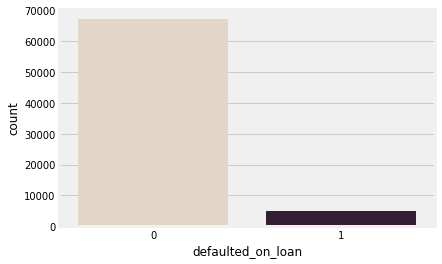

In [46]:
sns.countplot(data=train, x='defaulted_on_loan', order=train2.defaulted_on_loan.value_counts().index,palette ='ch:.25')


As you might guess, we have highly imbalanced dataset. We either will balance the labels, or choose algortihm that will not be affected. 

In [22]:
train["defaulted_on_loan"].value_counts()

0    67148
1     5013
Name: defaulted_on_loan, dtype: int64

In [37]:
#Exporting the datasets:
#train.to_csv("trainEDA.csv", index=False)
#test.to_csv("testEDA.csv", index=False)